# Initialize Data

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [26]:

num_samples = 200

x1 = np.random.uniform(0, 5, num_samples)
x2 = np.random.uniform(5, 10, num_samples)
x3 = x2**2 * x1 
noise = np.random.normal(0, 1, num_samples)  

y = np.random.uniform(10,20,num_samples)
y = y + noise
data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})

print(data.head())

         x1        x2          x3          y
0  4.565249  5.410127  133.622450  17.958066
1  1.519562  9.389409  133.966115  15.664141
2  3.167718  8.954076  253.973277  17.766972
3  3.770231  5.468139  112.731953   9.831642
4  0.456589  8.629199   33.999055  20.758128


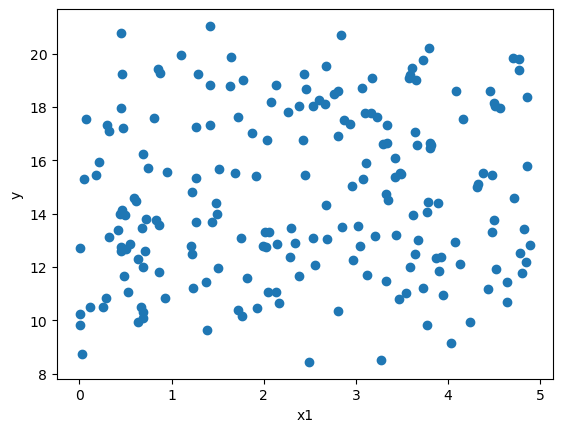

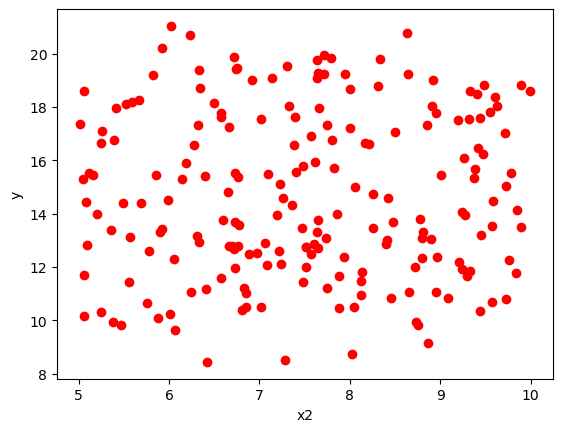

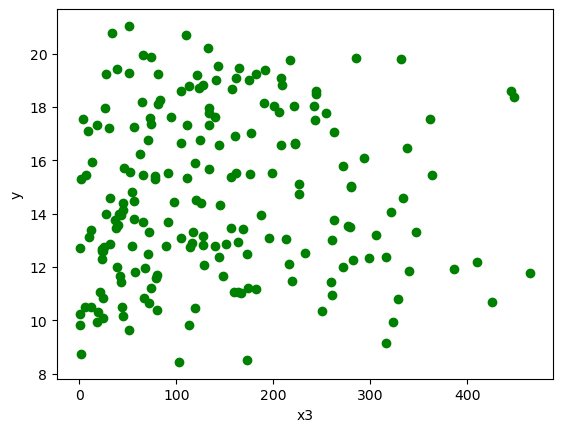

In [27]:
plt.scatter(data['x1'], data['y'])
plt.xlabel('x1')
plt.ylabel('y')
plt.show()
plt.scatter(data['x2'], data['y'],color = 'red')
plt.xlabel('x2')
plt.ylabel('y')
plt.show()
plt.scatter(data['x3'], data['y'],color = 'green')
plt.xlabel('x3')
plt.ylabel('y')
plt.show()


# Train  & Test Data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:

train_data, test_data = train_test_split(data, test_size=0.2)

print("Train Dim:", train_data.shape)
print("Test Dim:", test_data.shape)


Train Dim: (160, 4)
Test Dim: (40, 4)


# Train By Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

In [31]:

# split features and lables
X_train = train_data[['x1', 'x2', 'x3']]
y_train = train_data['y']
X_test = test_data[['x1', 'x2', 'x3']]
y_test = test_data['y']

In [32]:
# train linear regression  
degrees = range(1,10)
simple_regression_models = {}

for degree in degrees:
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    simple_regression_models[degree] = regression_model


# Train By Regularization

In [33]:
from sklearn.linear_model import Lasso, Ridge

In [34]:
alpha_l1 = 0.01
alpha_l2 = 0.01


In [35]:
# Train By Poly Regression By Regularization
polynomial_lasso_models = {}
polynomial_ridge_models = {}

for degree in degrees:
    #train Lasso 
    poly_lasso_model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha_l1))
    poly_lasso_model.fit(X_train, y_train)
    polynomial_lasso_models[degree] = poly_lasso_model

    #train Ridge
    poly_ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha_l2))
    poly_ridge_model.fit(X_train, y_train)
    polynomial_ridge_models[degree] = poly_ridge_model


# Evaluation MSE

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:

# ارزیابی مدل‌های کرنل چند جمله‌ای با منظم‌سازی نرم ۱
poly_lasso_mse_values = []
for degree, poly_lasso_model in polynomial_lasso_models.items():
    poly_lasso_predictions = poly_lasso_model.predict(X_test)
    poly_lasso_mse = mean_squared_error(y_test, poly_lasso_predictions)
    poly_lasso_mse_values.append(poly_lasso_mse)

# ارزیابی مدل‌های کرنل چند جمله‌ای با منظم‌سازی نرم ۲
poly_ridge_mse_values = []
for degree, poly_ridge_model in polynomial_ridge_models.items():
    poly_ridge_predictions = poly_ridge_model.predict(X_test)
    poly_ridge_mse = mean_squared_error(y_test, poly_ridge_predictions)
    poly_ridge_mse_values.append(poly_ridge_mse)

regression_mse_values = []
for degree, reg_model in simple_regression_models.items():
    reg_predictions = reg_model.predict(X_test)
    reg_mse = mean_squared_error(y_test, reg_predictions)
    regression_mse_values.append(reg_mse)    

# نمایش نتایج
print("Linear Regression:")

for degree, regression_mse , poly_lasso_mse, poly_ridge_mse in zip(degrees,regression_mse_values , poly_lasso_mse_values, poly_ridge_mse_values):
    print(f"\nPolynomial Regression (Degree {degree}):")
    print(f"Mean Squared Error (Simple Regularization): {regression_mse}")
    print(f"Mean Squared Error (L1 Regularization): {poly_lasso_mse}")
    print(f"Mean Squared Error (L2 Regularization): {poly_ridge_mse}")


Linear Regression:

Polynomial Regression (Degree 1):
Mean Squared Error (Simple Regularization): 7.145140603799081
Mean Squared Error (L1 Regularization): 7.1495196146230215
Mean Squared Error (L2 Regularization): 7.145173064549434

Polynomial Regression (Degree 2):
Mean Squared Error (Simple Regularization): 7.145140603799081
Mean Squared Error (L1 Regularization): 7.18905968683205
Mean Squared Error (L2 Regularization): 7.441652314848662

Polynomial Regression (Degree 3):
Mean Squared Error (Simple Regularization): 7.145140603799081
Mean Squared Error (L1 Regularization): 7.323717997594531
Mean Squared Error (L2 Regularization): 8.029013374543231

Polynomial Regression (Degree 4):
Mean Squared Error (Simple Regularization): 7.145140603799081
Mean Squared Error (L1 Regularization): 7.346021580123072
Mean Squared Error (L2 Regularization): 9.038702094891647

Polynomial Regression (Degree 5):
Mean Squared Error (Simple Regularization): 7.145140603799081
Mean Squared Error (L1 Regulariz

In [38]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer

In [39]:

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initial Mse for Error func
mse_scorer = make_scorer(mean_squared_error)


# Evaluation Regression simple
polynomial_scores = []
for degree, poly_model in simple_regression_models.items():
    poly_scores = cross_val_score(poly_model, X_train, y_train, cv=kf, scoring=mse_scorer)
    average_poly_mse = np.mean(poly_scores)
    polynomial_scores.append((degree, average_poly_mse))

# Evaluation Regression polynomial by Lasso
poly_lasso_scores = []
for degree, poly_lasso_model in polynomial_lasso_models.items():
    poly_lasso_scores_fold = cross_val_score(poly_lasso_model, X_train, y_train, cv=kf, scoring=mse_scorer)
    average_poly_lasso_mse = np.mean(poly_lasso_scores_fold)
    poly_lasso_scores.append((degree, average_poly_lasso_mse))

# Evaluation Regression polynomial by Ridge
poly_ridge_scores = []
for degree, poly_ridge_model in polynomial_ridge_models.items():
    poly_ridge_scores_fold = cross_val_score(poly_ridge_model, X_train, y_train, cv=kf, scoring=mse_scorer)
    average_poly_ridge_mse = np.mean(poly_ridge_scores_fold)
    poly_ridge_scores.append((degree, average_poly_ridge_mse))

# Result
best_poly_degree, best_poly_mse = min(polynomial_scores, key=lambda x: x[1])
print(f"Best Polynomial Regression Model (Degree {best_poly_degree}):")
print(f"Average Mean Squared Error (MSE) across {num_folds} folds: {best_poly_mse}")

best_poly_lasso_degree, best_poly_lasso_mse = min(poly_lasso_scores, key=lambda x: x[1])
print(f"\nBest Polynomial Lasso Regression Model (Degree {best_poly_lasso_degree}):")
print(f"Average Mean Squared Error (MSE) across {num_folds} folds: {best_poly_lasso_mse}")

best_poly_ridge_degree, best_poly_ridge_mse = min(poly_ridge_scores, key=lambda x: x[1])
print(f"\nBest Polynomial Ridge Regression Model (Degree {best_poly_ridge_degree}):")
print(f"Average Mean Squared Error (MSE) across {num_folds} folds: {best_poly_ridge_mse}")


Best Polynomial Regression Model (Degree 1):
Average Mean Squared Error (MSE) across 5 folds: 10.031257959574692

Best Polynomial Lasso Regression Model (Degree 4):
Average Mean Squared Error (MSE) across 5 folds: 9.888391685394842

Best Polynomial Ridge Regression Model (Degree 1):
Average Mean Squared Error (MSE) across 5 folds: 10.031239481788587


    Best Result is (Accourding 5-Fold Validiation) : Lasso Regression in Degree 4